## Подготовка данных для построения поканальных спектров

    Отбор по рабочему напряжению.
    Приведение токов к одному напряжению.

Время взято из данных GPS - мировое время UTC.

In [1]:
!date
!pwd

Чт янв 10 15:45:29 MSK 2019
/home/sphere/ExpData/2018/Data/2018_12_07-08_run2/spectrums


In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import dates
import datetime as dt

In [3]:
plt.rcParams['figure.figsize'] =(8,4)
plt.rcParams['lines.markersize'] = 3
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['grid.alpha'] = 0.7
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['font.size'] = 12

# Чтение данных 

In [4]:
''' чтение данных из дебаг. файлов '''

data = pd.read_csv('high.txt', index_col=False, sep='\s+')
data['strTime'] =  data['GPS'].astype('str')

#data['Uhigh'] = data.kod1 * 0.01514 - 36.60 - 1.9
data['Uhigh'] = data.high - 1.9
print(len(data))
data.head(3)

7963


,EID,GPS,kod1,kod2,kod3,kod4,high,cur,temp,strTime,Uhigh
0,20546,17:47:29,739,3627,3738,1088,-25.41,0.556,4.4,17:47:29,-27.31
1,20547,17:47:29,739,3627,3738,1088,-25.41,0.556,4.4,17:47:29,-27.31
2,20548,17:47:29,739,3627,3738,1088,-25.41,0.556,4.4,17:47:29,-27.31


In [5]:
'''чтение данных токов из событий'''

head=['EID','H','UTC']+['cur'+str(x) for x in range(112)]
curr = pd.read_csv('currents.txt', index_col=False, header=None, names=head, sep='\s+')
curr = curr[['EID','H', 'UTC', 'cur52']]
print(len(curr))
curr[:3]

5950


,EID,H,UTC,cur52
0,21510,145.2,18:01:05,58.0
1,21511,145.2,18:01:05,58.0
2,21512,145.1,18:01:25,58.0


In [6]:
''' Соединим два списка, чтобы оставить только данные для событий '''
news = pd.merge(data,curr,how='inner', on='EID')
news.shape

(5670, 14)

In [7]:
''' Чтение списка отобранных событий '''

events = pd.read_csv('data_to_analyze.csv', index_col=0)
events=events.drop(labels=['UTC', 'Type'], axis = 1)
print(len(events))
events[:3]

2143


,EID,Dt,Atotal,TG5time,TL2time,TL3time,TRIGGER,Amax,Fifo_err
162,23001,5,1014,472,243,243,243,285,0
164,23003,3,881,472,243,243,243,327,0
166,23005,3,5564,242,242,242,242,810,0


In [8]:
''' Оставим только отобранные события '''
new = pd.merge(news, events, how='inner', on='EID')
print(new.shape)
new[:3]

(2143, 22)


,EID,GPS,kod1,kod2,kod3,kod4,high,cur,temp,strTime,...,UTC,cur52,Dt,Atotal,TG5time,TL2time,TL3time,TRIGGER,Amax,Fifo_err
0,23001,18:20:16,652,3533,3737,1069,-26.73,1.022,3.5,18:20:16,...,18:20:16,108.0,5,1014,472,243,243,243,285,0
1,23003,18:20:37,652,3533,3737,1069,-26.73,1.022,3.5,18:20:37,...,18:20:37,108.0,3,881,472,243,243,243,327,0
2,23005,18:20:42,652,3533,3737,1069,-26.73,1.022,3.5,18:20:42,...,18:20:42,108.0,3,5564,242,242,242,242,810,0


In [9]:
''' Отбросим события с низким напряжением '''
new = new[new.Uhigh < -25.0]
print(new.shape)

(2122, 22)


In [10]:
new.describe()

,EID,kod1,kod2,kod3,kod4,high,cur,temp,Uhigh,H,cur52,Dt,Atotal,TG5time,TL2time,TL3time,TRIGGER,Amax,Fifo_err
count,2122.000000,2122.000000,2122.000000,2122.000000,2122.000000,2122.000000,2122.000000,2122.000000,2122.000000,2122.000000,2122.000000,2122.000000,2122.000000,2122.000000,2122.000000,2122.000000,2122.000000,2122.000000,2122.000000
mean,25601.608860,618.979265,3445.455231,3733.884543,1024.517436,-27.185589,1.415991,1.219369,-29.085589,138.185061,143.885957,4.175306,1541.439208,453.754006,240.815269,360.044769,240.815269,361.405749,0.004713
std,1624.881274,10.824368,29.564689,1.636269,8.195336,0.241720,0.174319,0.420802,0.241720,1.292738,15.614317,2.339702,4556.422186,61.925529,4.497974,114.643668,4.497974,239.833075,0.096991
min,23001.000000,611.000000,3403.000000,3730.000000,1009.000000,-27.330000,0.992000,0.400000,-29.230000,133.500000,0.000000,1.000000,1.000000,241.000000,221.000000,240.000000,221.000000,121.000000,0.000000
25%,24183.500000,618.000000,3423.000000,3733.000000,1020.000000,-27.240000,1.338000,1.000000,-29.140000,137.300000,137.000000,3.000000,260.000000,472.000000,241.000000,243.000000,241.000000,159.000000,0.000000
50%,25458.000000,618.000000,3442.000000,3734.000000,1024.000000,-27.240000,1.453000,1.200000,-29.140000,138.200000,146.000000,4.000000,601.000000,472.000000,242.000000,472.000000,242.000000,193.000000,0.000000
75%,27136.500000,618.000000,3461.000000,3735.000000,1025.000000,-27.240000,1.559000,1.200000,-29.140000,139.100000,155.000000,5.000000,1782.500000,472.000000,243.000000,472.000000,243.000000,613.000000,0.000000
max,28787.000000,685.000000,3542.000000,3738.000000,1069.000000,-26.230000,1.654000,3.500000,-28.130000,140.400000,165.000000,20.000000,88750.000000,473.000000,245.000000,473.000000,245.000000,896.000000,2.000000


## Draw

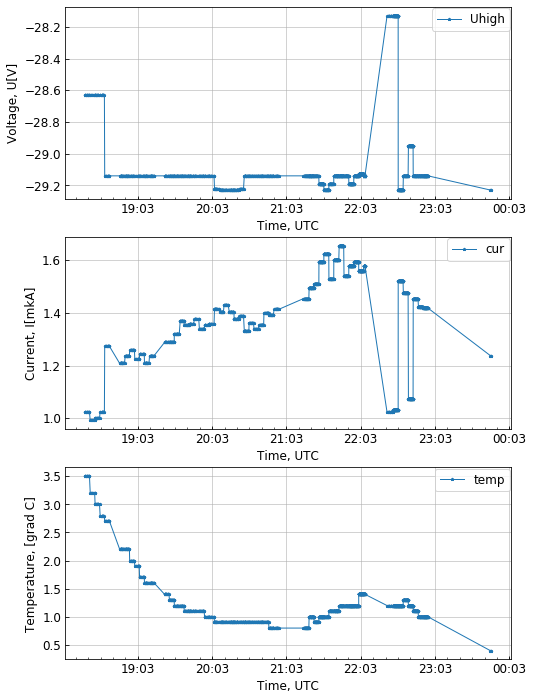

In [11]:
ylabel = ['Voltage, U[V]', 'Current, I[mkA]', 'Temperature, [grad C]']
x = [dt.datetime.strptime(i, '%H:%M:%S') for i in new['strTime']]

fig, axn = plt.subplots(3,1, figsize=(8,12), sharex=True )
for (i, ax), y in zip(enumerate(axn.flat), ['Uhigh','cur','temp']):
    ax = plt.subplot (3, 1, i+1)
    ax.plot(x, new[y], '*-', label = y)
    
    ax.set_xlabel('Time, UTC')
    ax.set_ylabel(ylabel[i])
    ax.xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
    ax.xaxis.set_major_locator(dates.MinuteLocator(interval=60))  # <--- NOTE!
    ax.xaxis.set_minor_locator(dates.MinuteLocator(interval=10))  # <--- NOTE!
    plt.legend(borderaxespad=0.1)
    plt.grid()
    i += 1
#fig.autofmt_xdate()

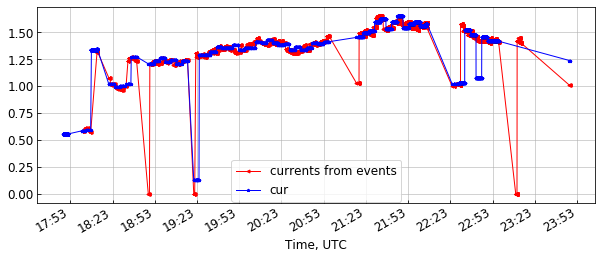

In [12]:
''' draw all currents '''
for y in ['cur']:
    #plt.figure()
    fig, ax = plt.subplots(figsize=(10,4))
        
    x1 = [dt.datetime.strptime(i, '%H:%M:%S') for i in curr['UTC']]
    y1 = curr.cur52 * 0.01
    plt.plot(x1, y1, '<-r', label = 'currents from events')

    x = [dt.datetime.strptime(i, '%H:%M:%S') for i in data['strTime']]
    plt.plot(x, data[y], '*-b', label = y)

    plt.xlabel('Time, UTC')
    ax.xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
    ax.xaxis.set_major_locator(dates.MinuteLocator(interval=30))  # <--- NOTE!
    fig.autofmt_xdate()
    plt.legend(borderaxespad=0.1)
    plt.grid();

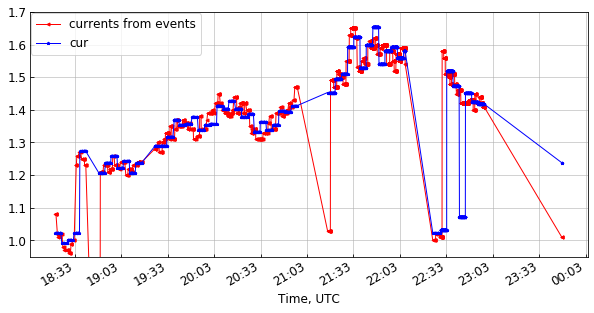

In [13]:
''' draw currents for selected events '''

fig, ax = plt.subplots(figsize=(10,5))
x1 = [dt.datetime.strptime(i, '%H:%M:%S') for i in new['UTC']]
y1 = new.cur52 * 0.01
plt.plot(x1, y1, '<-r', label = 'currents from events')
plt.plot(x1, new.cur, '*-b', label = y)
plt.xlabel('Time, UTC')
plt.ylim(0.95,1.7)
ax.xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(dates.MinuteLocator(interval=30))  # <--- NOTE!
fig.autofmt_xdate()
plt.legend(borderaxespad=0.1)
plt.grid();

## Учет температуры

Температура изменялась в пределах от 0.4 до 3.5 градусов. Считаем ее практически постоянной. При необходимости, оценим влияние 3 градусов позднее.

In [14]:
new.temp.describe()

count    2122.000000
mean        1.219369
std         0.420802
min         0.400000
25%         1.000000
50%         1.200000
75%         1.200000
max         3.500000
Name: temp, dtype: float64

In [15]:
## тепловой шум для напряжения V = 29.2B, DAC = 255
def f255(x):
    return 0.456 * np.exp(0.079*(x))

## тепловой шум для напряжения V = 28.8B, DAC = 250
def f250(x):
    return f255(x) * 0.868   #0.85436  ## 35.2/41.2 = 0.8543689

print(f250(3.5)/f250(0.4))

1.27749355746


## Приведение к одному напряжению

Приводим к напряжению -29.14 как к наиболее частому.

In [16]:
new.Uhigh.describe()

count    2122.000000
mean      -29.085589
std         0.241720
min       -29.230000
25%       -29.140000
50%       -29.140000
75%       -29.140000
max       -28.130000
Name: Uhigh, dtype: float64

Подбор  зависимости тока от напряжения проведен в 
/home/sphere/ExpData/2018/Data/2018_12_07-08_run2/high/I(U)\_approximation

В диапазоне от -27.0 до -29.5 В можно использовать линейное приближение:

I(U) = -13.23 * U - 345


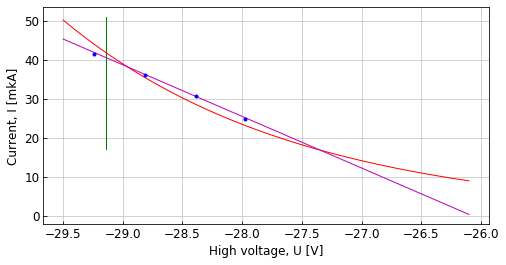

In [17]:
# linear fit for voltage
def flin(x):
    return -13.23 * x - 345

# exponenta fit for voltage
def f(x):
    #return 0.0159 * np.exp(-0.502*(x + 13.4)**1)
    return 0.01534 * np.exp(-0.508*(x + 13.57)**1)

x = [-29.143, -29.143]
y = [17, 51]
plt.plot(x,y,'g-')

t1 = np.arange(-29.5,-26,0.1)
plt.plot(t1, f(t1),    'r-')
plt.plot(t1, flin(t1), 'm-')

I = [ 24.728257, 30.622831,  36.058619,  41.530859]
U = [ -27.975076, -28.385462, -28.809897, -29.240659]
plt.plot(U, I,'bo')

plt.xlabel('High voltage, U [V]')
plt.ylabel('Current, I [mkA]')
plt.grid()

In [18]:
''' Пересчет к напряжению -29.143 '''
U = -30.0
I = flin(-29.14)/flin(U)
I 

0.7807745664739879

In [19]:
new['I_coef'] = flin(-29.14)/flin(new['Uhigh'])
new['cur_n']  = new.cur * new['I_coef']
new = new[new.Uhigh < -25.0]
new.shape

(2122, 24)

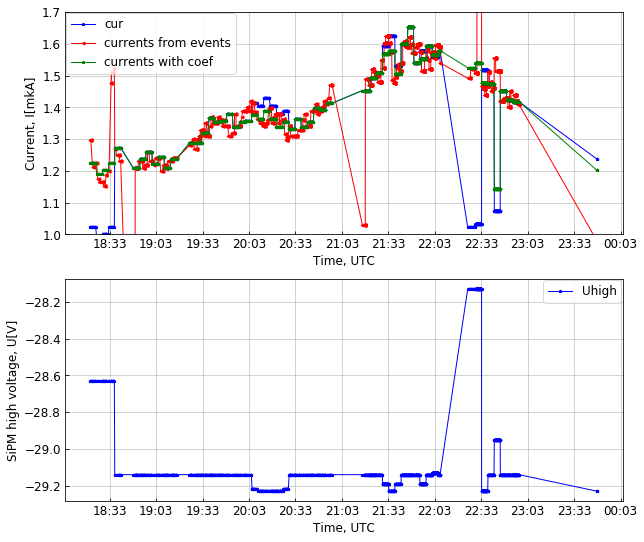

In [20]:
fig, axn = plt.subplots(2,1, figsize=(10,9), sharex=True )
x = [dt.datetime.strptime(i, '%H:%M:%S') for i in new['strTime']]
for (i, ax), y in zip(enumerate(axn.flat), ['cur','Uhigh']):
    ax = plt.subplot (2, 1, i+1)
    plt.plot(x, new[y], '*-b', label = y)
    
    if y == 'cur':
        y1 = new.cur52 * new['I_coef'] * 0.01
        plt.plot(x1, y1, '<-r', label = 'currents from events')
        plt.plot(x, new.cur_n, '*-g', label = 'currents with coef') 
        plt.ylim(1.0,1.7)
        plt.ylabel('Current, I[mkA]')
    if y == 'Uhigh':
        #plt.ylim(-29.5,-27)
        plt.ylabel('SiPM high voltage, U[V]')
        
    plt.xlabel('Time, UTC')
    ax.xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
    ax.xaxis.set_major_locator(dates.MinuteLocator(interval=30))  # <--- NOTE!
    #fig.autofmt_xdate()
    plt.legend(borderaxespad=0.1)
    plt.grid();

In [21]:
new[new.cur52 < 1]

,EID,GPS,kod1,kod2,kod3,kod4,high,cur,temp,strTime,...,Dt,Atotal,TG5time,TL2time,TL3time,TRIGGER,Amax,Fifo_err,I_coef,cur_n
66,23135,18:48:23,618,3492,3733,1045,-27.24,1.208,2.2,18:48:23,...,3,823,472,244,244,244,282,0,1.0,1.208
67,23137,18:48:34,618,3492,3733,1045,-27.24,1.208,2.2,18:48:34,...,6,1572,472,241,242,241,286,0,1.0,1.208
68,23139,18:49:13,618,3492,3733,1045,-27.24,1.208,2.2,18:49:13,...,3,2035,472,243,244,243,538,0,1.0,1.208


In [23]:
new.to_csv("data_events_to_spectrum.csv")
new[['EID','I_coef']].to_csv("I_coef.csv", index = False)

## END